In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
powerdata = pd.read_excel(r"C:\Users\CEN1\OneDrive - U.S. NRC\CEN1\GAData\Powerdata1.xlsx", index_col=0)

In [4]:
powerdata.head()

,Quarter,DocketNumber,DocketName,Power
Index,,,,
1,2002Q1,5000313,Arkansas Nuclear 1,99.988889
2,2002Q2,5000313,Arkansas Nuclear 1,99.967033
3,2002Q3,5000313,Arkansas Nuclear 1,96.673913
4,2002Q4,5000313,Arkansas Nuclear 1,55.500000
5,2003Q1,5000313,Arkansas Nuclear 1,100.000000


In [5]:
powerdata.groupby(['DocketNumber']).mean()

,Power
DocketNumber,
5000219,91.191030
5000220,92.399066
5000237,92.159288
5000244,93.441117
5000247,91.339917
...,...
5000498,89.487366
5000499,87.584592
5000528,86.543963


In [6]:
actionmatrix = pd.read_excel(r"C:\Users\CEN1\OneDrive - U.S. NRC\CEN1\GAData\ActionMatrixdata.xlsx", index_col=0)

In [7]:
actionmatrix.shape

(7540, 4)

In [8]:
powerdata.shape

(7540, 4)

In [9]:
actionmatrix.tail()

,Quarter,DocketNum,Name,AM Column
Index,,,,
7536,2019Q2,5000482,Wolf Creek 1,1
7537,2019Q3,5000482,Wolf Creek 1,1
7538,2019Q4,5000482,Wolf Creek 1,1
7539,2020Q1,5000482,Wolf Creek 1,1
7540,2020Q2,5000482,Wolf Creek 1,1


In [10]:
powerdata.tail()

,Quarter,DocketNumber,DocketName,Power
Index,,,,
7536,2019Q2,5000482,Wolf Creek 1,99.934066
7537,2019Q3,5000482,Wolf Creek 1,89.130435
7538,2019Q4,5000482,Wolf Creek 1,58.836957
7539,2020Q1,5000482,Wolf Creek 1,97.747253
7540,2020Q2,5000482,Wolf Creek 1,99.582418


In [11]:
actionmatrix.rename(columns={'AM Column':'AMColumn'}, inplace=True)

In [12]:
actionmatrix.columns

Index(['Quarter', 'DocketNum', 'Name', 'AMColumn'], dtype='object')

In [13]:
actionmatrix.dtypes

Quarter      object
DocketNum     int64
Name         object
AMColumn      int64
dtype: object

In [14]:
powerdata.dtypes

Quarter          object
DocketNumber      int64
DocketName       object
Power           float64
dtype: object

In [15]:
new_data = pd.merge(powerdata, actionmatrix, how='left', left_index=True, right_index=True, suffixes=("", '_am'))
new_data.tail()

,Quarter,DocketNumber,DocketName,Power,Quarter_am,DocketNum,Name,AMColumn
Index,,,,,,,,
7536,2019Q2,5000482,Wolf Creek 1,99.934066,2019Q2,5000482,Wolf Creek 1,1
7537,2019Q3,5000482,Wolf Creek 1,89.130435,2019Q3,5000482,Wolf Creek 1,1
7538,2019Q4,5000482,Wolf Creek 1,58.836957,2019Q4,5000482,Wolf Creek 1,1
7539,2020Q1,5000482,Wolf Creek 1,97.747253,2020Q1,5000482,Wolf Creek 1,1
7540,2020Q2,5000482,Wolf Creek 1,99.582418,2020Q2,5000482,Wolf Creek 1,1


In [16]:
newdata = new_data[['Quarter', 'DocketNumber', 'DocketName', 'Power', 'AMColumn']]

In [17]:
newdata.corr()

,DocketNumber,Power,AMColumn
DocketNumber,1.000000,-0.003835,-0.036329
Power,-0.003835,1.000000,-0.117834
AMColumn,-0.036329,-0.117834,1.000000


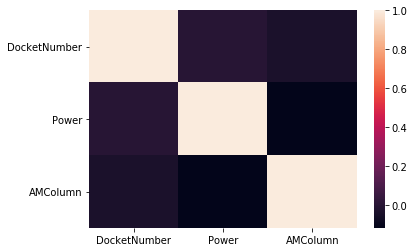

In [18]:
sns.heatmap(newdata.corr())

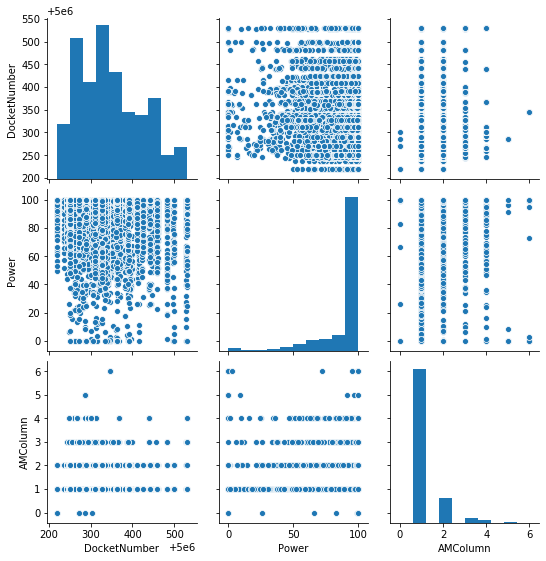

In [19]:
sns.pairplot(newdata);

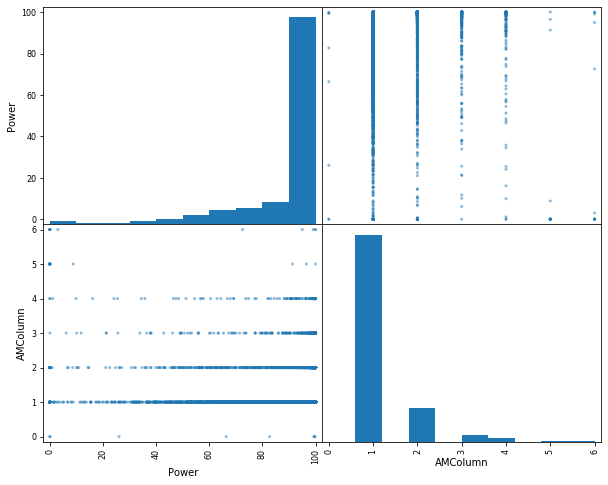

In [20]:
pd.plotting.scatter_matrix(newdata[['Power', 'AMColumn']], figsize=(10, 8));

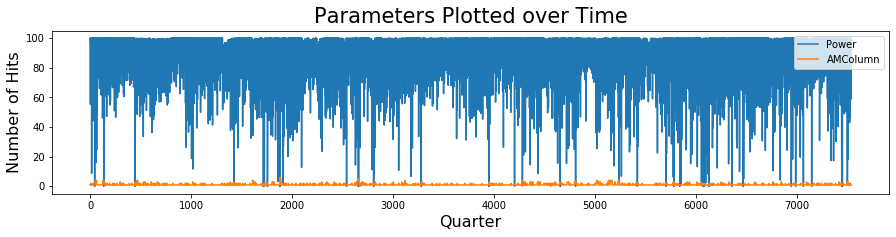

In [21]:
#plot power and action matrix column over time
ax1 = newdata[['Power', 'AMColumn']].plot(kind='line', figsize=(15,3));

# Set the title.
ax1.set_title('Parameters Plotted over Time', fontsize=21, y=1.01);

# Move the legend.
ax1.legend(loc=1);

# x-axis labels
ax1.set_ylabel('Number of Hits', fontsize=16);

# y-axis labels
ax1.set_xlabel('Quarter', fontsize=16);

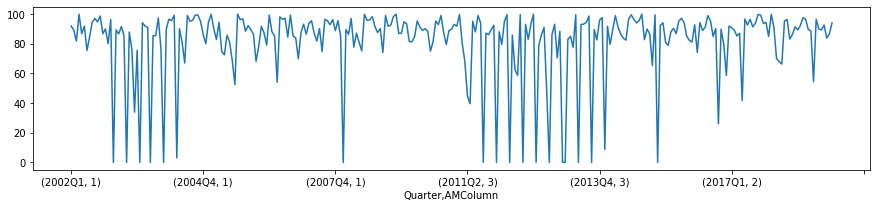

In [22]:
avgdata = newdata.groupby(by=['Quarter', 'AMColumn'])['Power'].mean().plot(kind="line", figsize=(15,3))

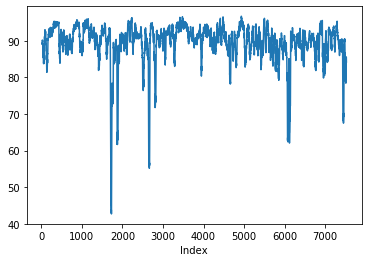

In [23]:
newdata.rolling(window=30, center=True).mean()['Power'].plot()

In [56]:
newdata.set_index("Quarter",drop=True,inplace=True)

In [57]:
pilgrimdata = newdata[newdata['DocketName'] == 'Pilgrim 1']

In [59]:
pilgrimdata.head()

,DocketNumber,DocketName,Power,AMColumn
Quarter,,,,
2002Q1,5000293,Pilgrim 1,99.388889,1
2002Q2,5000293,Pilgrim 1,98.428571,1
2002Q3,5000293,Pilgrim 1,98.108696,1
2002Q4,5000293,Pilgrim 1,99.402174,1
2003Q1,5000293,Pilgrim 1,88.811111,1


In [169]:
fig, ax1 = plt.subplots()
pilgrimdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
pilgrimdata['AMColumn'].plot(secondary_y=True,ax=ax1,color='g',linewidth=1.0)
ax = pilgrimdata['Power'].plot(); 
ax.set_title('Pilgrim Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
pilgrimdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

TypeError: __init__() got an unexpected keyword argument 'legend'

Text(0, 0.5, 'Column')

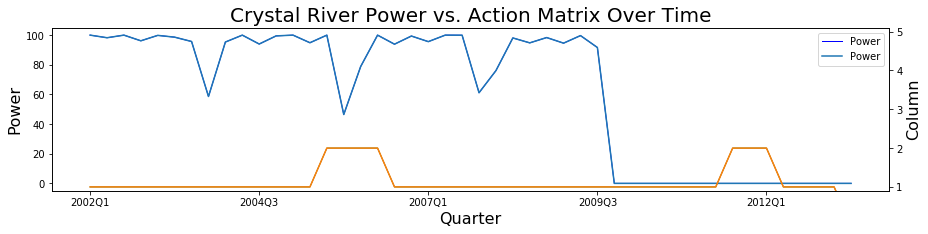

In [153]:
#print("Which site's data would you like to see?")

fig, ax1 = plt.subplots()
cr3data = newdata[newdata['DocketName'] == 'Crystal River 3']
cr3data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
cr3data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = cr3data['Power'].plot(); 
ax.set_title('Crystal River Power vs. Action Matrix Over Time', fontsize=20);
ax.legend(loc=1);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
cr3data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

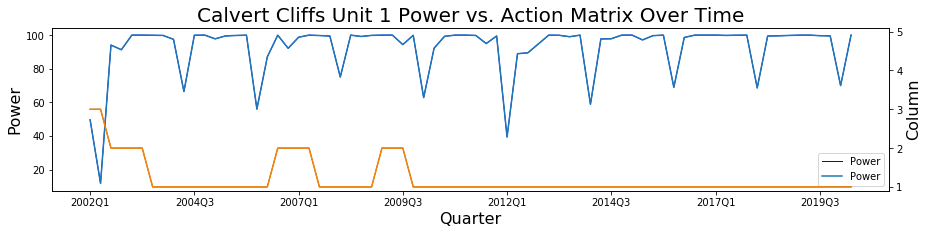

In [154]:
fig, ax1 = plt.subplots()
cc1data = newdata[newdata['DocketName'] == 'Calvert Cliffs 1']
cc1data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
cc1data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = cc1data['Power'].plot(); 
ax.set_title('Calvert Cliffs Unit 1 Power vs. Action Matrix Over Time', fontsize=20);
ax.legend(loc=1);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
cc1data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

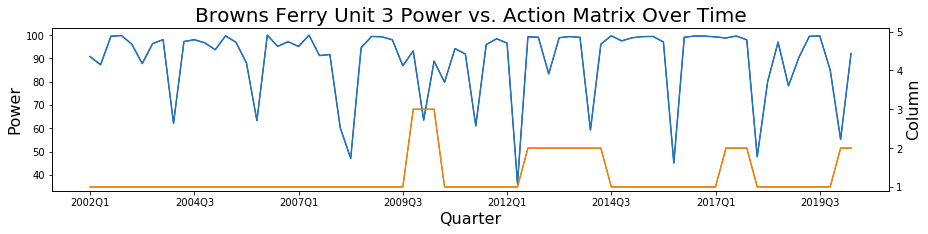

In [155]:
fig, ax1 = plt.subplots()
bf3data = newdata[newdata['DocketName'] == 'Browns Ferry 3']
bf3data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
bf3data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = bf3data['Power'].plot(); 
ax.set_title('Browns Ferry Unit 3 Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
bf3data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

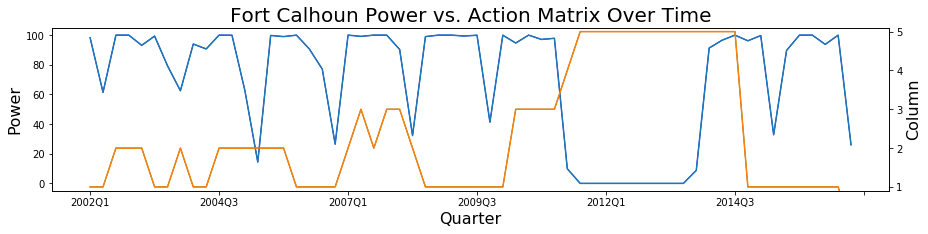

In [156]:
fig, ax1 = plt.subplots()
fc1data = newdata[newdata['DocketName'] == 'Fort Calhoun']
fc1data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
fc1data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = fc1data['Power'].plot(); 
ax.set_title('Fort Calhoun Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
fc1data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

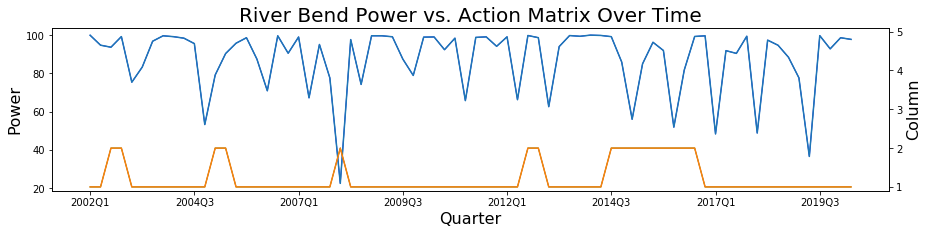

In [157]:
fig, ax1 = plt.subplots()
rbdata = newdata[newdata['DocketName'] == 'River Bend 1']
rbdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
rbdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = rbdata['Power'].plot(); 
ax.set_title('River Bend Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
rbdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

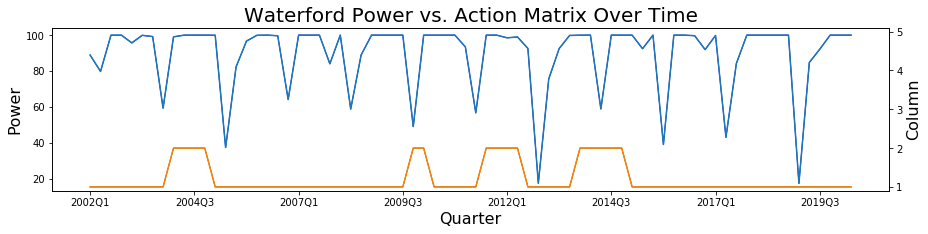

In [158]:
fig, ax1 = plt.subplots()
waterdata = newdata[newdata['DocketName'] == 'Waterford 3']
waterdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
waterdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = waterdata['Power'].plot(); 
ax.set_title('Waterford Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
waterdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

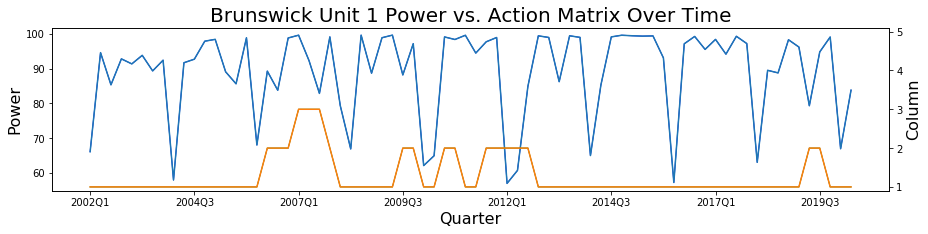

In [159]:
fig, ax1 = plt.subplots()
bruns1data = newdata[newdata['DocketName'] == 'Brunswick 1']
bruns1data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
bruns1data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = bruns1data['Power'].plot(); 
ax.set_title('Brunswick Unit 1 Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
bruns1data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

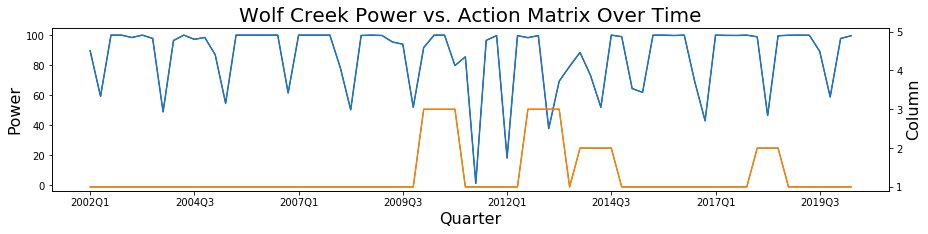

In [160]:
fig, ax1 = plt.subplots()
wc1data = newdata[newdata['DocketName'] == 'Wolf Creek 1']
wc1data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
wc1data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = wc1data['Power'].plot(); 
ax.set_title('Wolf Creek Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
wc1data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

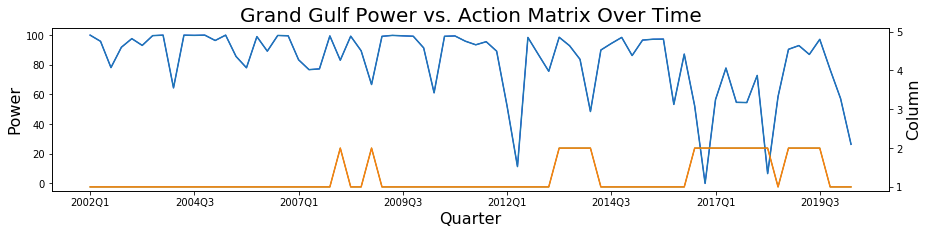

In [161]:
fig, ax1 = plt.subplots()
ggdata = newdata[newdata['DocketName'] == 'Grand Gulf 1']
ggdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
ggdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = ggdata['Power'].plot(); 
ax.set_title('Grand Gulf Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
ggdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

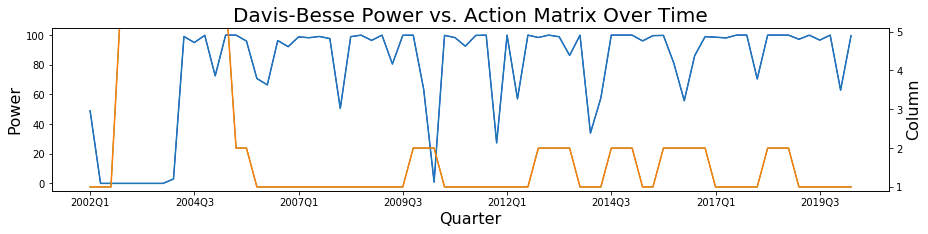

In [162]:
fig, ax1 = plt.subplots()
dbdata = newdata[newdata['DocketName'] == 'Davis-Besse']
dbdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
dbdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = dbdata['Power'].plot(); 
ax.set_title('Davis-Besse Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
dbdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

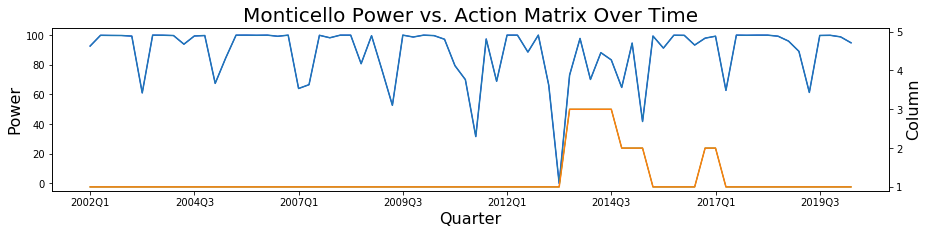

In [163]:
fig, ax1 = plt.subplots()
montdata = newdata[newdata['DocketName'] == 'Monticello']
montdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
montdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = montdata['Power'].plot(); 
ax.set_title('Monticello Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
montdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

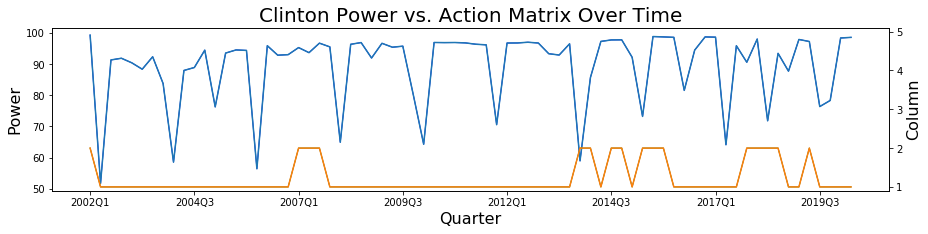

In [164]:
fig, ax1 = plt.subplots()
clintdata = newdata[newdata['DocketName'] == 'Clinton']
clintdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
clintdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = clintdata['Power'].plot(); 
ax.set_title('Clinton Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
clintdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

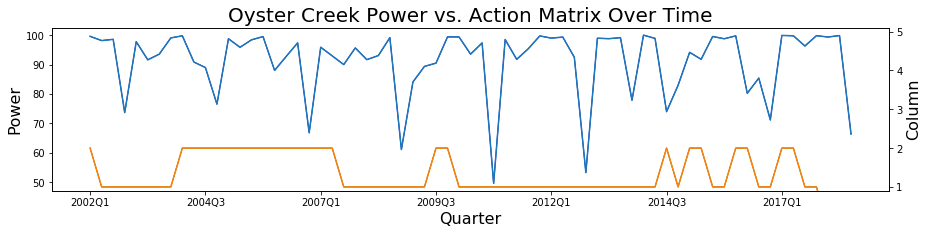

In [165]:
fig, ax1 = plt.subplots()
ocdata = newdata[newdata['DocketName'] == 'Oyster Creek']
ocdata['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
ocdata['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = ocdata['Power'].plot(); 
ax.set_title('Oyster Creek Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
ocdata['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

Text(0, 0.5, 'Column')

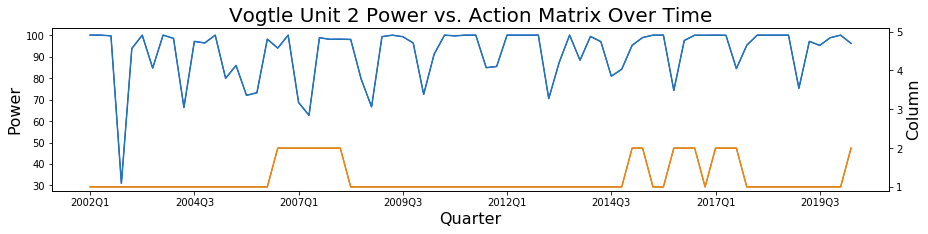

In [170]:
fig, ax1 = plt.subplots()
vog2data = newdata[newdata['DocketName'] == 'Vogtle 2']
vog2data['Power'].plot(ax=ax1,color='b',linewidth=1.0,figsize=(15,3))
vog2data['AMColumn'].plot(secondary_y=True, ax=ax1,color='g',linewidth=1.0)
ax = vog2data['Power'].plot(); 
ax.set_title('Vogtle Unit 2 Power vs. Action Matrix Over Time', fontsize=20);
ax.set_xlabel('Quarter', fontsize=16);
ax.set_ylabel('Power', fontsize=16);
vog2data['AMColumn'].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim(0.9,5.1)

plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Column', fontsize=16)

In [112]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
X = pd.newdata(newdata.data, columns=newdata.power)
y = pd.newdata(newdata.target, columns=['AMColumn'])
km.fit(X)

AttributeError: module 'pandas' has no attribute 'newdata'